<div style="font-size: 30px">
<font color='black'> <b>Predicting Loan Approval Status Using Demographic and Financial Features</b></font>

<a href="javascript:code_toggle()"><img src="https://images.ctfassets.net/eqyxjqxiewqq/4PxLWNYvBIMhuXT8q2HTRA/5272644d36c683830bf8b374cf17c78e/APPROVE_OR_REJECT_YOUR_INVENTORY_SCAN.jpg" width="1060"></a>


## Table of Contents
*  [ Project Overview](#chapter1)
    *  [1.1 Introduction](#section1_1)
    *  [1.2 Aim](#section1_2)
    *  [1.3 Objectives](#section1_3)
*  [ Importing Packages](#chapter2)
*  [ Loading Data](#chapter3)
*  [ Data Cleaning](#chapter4)
*  [ Exploratory data analysis (EDA)](#chapter5)
*  [ Data Preprocessing](#chapter6) 
*  [ Feature Engineering](#chapter7)
*  [ Model Training and Evaluation](#chapter8)
*  [ Conclusion](#chapter10)



## Project Overview <a id="chapter1"><a>

#### 1.1 Introduction <a id="section1_1"></a>

Access to financial resources is a crucial factor in the economic development of individuals and communities. In today's competitive environment, lenders face the challenge of efficiently assessing loan applications to minimize risks and ensure fair lending practices. Traditional methods of evaluating loan applications often rely on manual assessments, which can be time-consuming and subjective. This project aims to leverage demographic and financial features to build predictive models that determine loan approval status more efficiently and accurately. By analyzing factors such as income, credit history, and socio-economic background, we can enhance the decision-making process for lenders and help applicants better understand their loan eligibility.

#### 1.2 Aim<a id="section1_2"></a>

The primary aim of this project is to develop a predictive model that accurately forecasts the approval status of loan applications based on various demographic and financial features. The model will help streamline the loan approval process, reduce the risk of defaults, and provide valuable insights for both lenders and applicants.

#### 1.3 Objectives<a id="section1_3"></a>

- **Develop a Data-Driven Predictive Model:** Create a robust predictive model using machine learning techniques to determine loan approval status based on demographic and financial data.

- **Identify Key Predictors:** Analyze the impact of various demographic and financial features, such as income, credit history, and socio-economic background, on loan approval outcomes.

- **Enhance Decision-Making Efficiency:** Provide lenders with a tool to streamline the loan approval process, reducing the time and effort required for manual assessments.

- **Minimize Risk of Loan Defaults:** Improve risk assessment by accurately identifying applicants with higher probabilities of default, enabling better risk management strategies.

## Importing Packages <a id="chapter2"><a>

<div class="alert alert-block alert-info">
<b>Importing Packages</b> is an essential step in any data analysis or machine learning project, as it allows you to access and utilize various libraries and tools to perform specific tasks. Python provides a rich ecosystem of packages for data manipulation, visualization, statistical analysis, and machine learning. Commonly used packages include pandas for data manipulation, matplotlib and seaborn for data visualization, scikit-learn for machine learning, and numpy for numerical computations. Importing the right packages at the beginning of your analysis ensures that you have the necessary tools to effectively explore and analyze your data.
</di>


In [57]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import mlflow

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_selection import SelectFromModel, RFE, SelectKBest, f_regression, f_classif
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit,cross_validate, KFold
from sklearn.linear_model import LogisticRegression, Lasso, LinearRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, roc_auc_score, brier_score_loss, f1_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc, log_loss, classification_report
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings('ignore')


%matplotlib inline

## Loading data <a id="chapter3"><a>

<div class="alert alert-block alert-info">
<b>Loading Data</b> is the initial step in the data analysis process, involving the retrieval and loading of data into a suitable format for analysis. This step is crucial as it sets the foundation for the entire analysis process. The data can be loaded from various sources such as CSV files, databases, or APIs. It is essential to ensure that the data is loaded correctly and that any initial preprocessing steps, such as handling missing values or encoding categorical variables, are performed accurately to prepare the data for further analysis.
</di>


In [58]:
# Load the data
Loan_data = pd.read_csv('Loan_Status.csv')

# Display the first 5 rows of each dataset
print("First 5 rows of Loan_data:")
print(Loan_data.head())

First 5 rows of Loan_data:
    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural        

## Data Cleaning <a id="chapter4"><a>

<div class="alert alert-block alert-info">
  <b>Data cleaning</b> is a crucial step in the data analysis process, involving the correction or removal of incorrect, corrupted, duplicate, or incomplete data within a dataset. Through various techniques such as filling missing values, removing outliers, and standardizing data formats, it ensures the accuracy and reliability of subsequent analyses and decision-making.
</div

**Data Shape**

In [59]:
# Get the shape of the Loan_data DataFrame
print('The shape of the Loan_data:', Loan_data.shape)

The shape of the Loan_data: (614, 13)


- Exploring the shape of the Loan_data

**Summary Information**

In [60]:
# Display summary information of the Loan_data DataFrame
print("The summary information of the Loan_data:", Loan_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
The summary information of the Loan_data: None


- Exploring the data types of the Loan_data

**Convert Data Types**

In [61]:
# Convert the specified columns to the required data types
Loan_data['ApplicantIncome'] = Loan_data['ApplicantIncome'].astype('int32')
Loan_data['CoapplicantIncome'] = Loan_data['CoapplicantIncome'].astype('float32')
Loan_data['LoanAmount'] = Loan_data['LoanAmount'].astype('float32')
Loan_data['Loan_Amount_Term'] = Loan_data['Loan_Amount_Term'].astype('float32')
Loan_data['Credit_History'] = Loan_data['Credit_History'].astype('float32')

# Check the updated data types
print(Loan_data.dtypes)


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int32
CoapplicantIncome    float32
LoanAmount           float32
Loan_Amount_Term     float32
Credit_History       float32
Property_Area         object
Loan_Status           object
dtype: object


**Checking Null Values**

In [62]:
# counting Null value
def check_null_values(df):
    """
    Print the count of null values for each column in a DataFrame.

    This function iterates through each column in the DataFrame to check for the presence of null values.
    If a column contains null values, it prints the column name along with the number of null values.

    Parameters:
    df (DataFrame): The pandas DataFrame to check for null values.

    Returns:
    None: This function does not return a value; it only prints information.
    """
    has_nulls = False
    for column in df:
        null_count = df[column].isnull().sum()
        if null_count > 0:
            print(f'{column} has {null_count} null values')
            has_nulls = True

    if not has_nulls:
        print('There are no null values in the Loan_data')

# Checking null values for Loan_data
print("Loan Data Null Values:")
check_null_values(Loan_data)

Loan Data Null Values:
Gender has 13 null values
Married has 3 null values
Dependents has 15 null values
Self_Employed has 32 null values
LoanAmount has 22 null values
Loan_Amount_Term has 14 null values
Credit_History has 50 null values


**Impute Null Values**

In [63]:
# Fill null values in numeric columns like 'LoanAmount' and 'Loan_Amount_Term' with the median
median_loan_amount = Loan_data["LoanAmount"].median()
median_loan_term = Loan_data["Loan_Amount_Term"].median()
Loan_data["LoanAmount"] = Loan_data["LoanAmount"].fillna(median_loan_amount)  # Fill missing 'LoanAmount' with median
Loan_data["Loan_Amount_Term"] = Loan_data["Loan_Amount_Term"].fillna(median_loan_term)  # Fill missing 'Loan_Amount_Term' with median

# Fill null values in categorical columns with the mode (most frequent value)
most_common_gender = Loan_data["Gender"].mode()[0]
most_common_married = Loan_data["Married"].mode()[0]
most_common_dependents = Loan_data["Dependents"].mode()[0]
most_common_self_employed = Loan_data["Self_Employed"].mode()[0]
most_common_credit_history = Loan_data["Credit_History"].mode()[0]

Loan_data["Gender"] = Loan_data["Gender"].fillna(most_common_gender)  # Fill missing 'Gender' with mode
Loan_data["Married"] = Loan_data["Married"].fillna(most_common_married)  # Fill missing 'Married' with mode
Loan_data["Dependents"] = Loan_data["Dependents"].fillna(most_common_dependents)  # Fill missing 'Dependents' with mode
Loan_data["Self_Employed"] = Loan_data["Self_Employed"].fillna(most_common_self_employed)  # Fill missing 'Self_Employed' with mode
Loan_data["Credit_History"] = Loan_data["Credit_History"].fillna(most_common_credit_history)  # Fill missing 'Credit_History' with mode


In [64]:
# Checking null values for Anime DataFrame after filling the null values
print("Loan Data Null Values:")
check_null_values(Loan_data)

Loan Data Null Values:
There are no null values in the Loan_data


**Checking Duplicates**

In [65]:
# counting duplicate value
def count_duplicate_rows(df):
    """
    Count the number of duplicate rows in a DataFrame.

    This function calculates the total number of duplicate rows in the DataFrame by calling the `duplicated` method,
    which marks duplicates as `True`, and then sums these cases.

    Parameters:
    df (pandas.DataFrame): The DataFrame to check for duplicates.

    Returns:
    int: The count of duplicate rows.
    """
    duplicate_count = df.duplicated().sum()
    return duplicate_count

# Counting duplicate rows for Loan_data
Loan_data_duplicates = count_duplicate_rows(Loan_data)

# Printing the count of duplicate rows
print(f"The number of duplicate rows in the Loan_data: {Loan_data_duplicates}")

The number of duplicate rows in the Loan_data: 0


**Final Data Shape**

In [66]:
# Display the cleaned DataFrame
print("loan_data after removing duplicate rows:")
print(Loan_data.shape)

loan_data after removing duplicate rows:
(614, 13)


#### Observations ####

1. **Data Shape:**
   - Original Shape: 614 rows, 13 columns.

2. **Data Types:**
   - Data types have been optimized for memory efficiency:
     - `ApplicantIncome`: int64 → int32.
     - `CoapplicantIncome`: float64 → float32.
     - `LoanAmount`: float64 → float32.
     - `Loan_Amount_Term`: float64 → float32.
     - `Credit_History`: float64 → float32.

3. **Null Values:**
   - **Numeric Columns:**
     - Missing values in `LoanAmount` and `Loan_Amount_Term` were filled with their respective median values.
   - **Categorical Columns:**
     - Missing values in `Gender`, `Married`, `Dependents`, `Self_Employed`, and `Credit_History` were filled with the mode (most frequent value).

4. **Duplicates:**
   - No duplicate rows were found.

# Exploratory Data Analysis (EDA) <a id="chapter5"><a>

<div class="alert alert-block alert-info">
<b>Exploratory Data Analysis (EDA)</b> is a vital step in the data analysis process, aimed at understanding the underlying patterns, relationships, and structure of the data. It involves various techniques such as visualizations, summary statistics, and correlation analysis to uncover insights and identify potential issues. EDA helps in forming hypotheses, guiding further analysis, and making informed decisions about data preprocessing and modeling.
</di>


In [67]:
# Summary Statistics for Numerical Variables
print(Loan_data.describe())

       ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
count       614.000000         614.000000  614.000000        614.000000   
mean       5403.459283        1621.245850  145.752441        342.410431   
std        6109.041673        2926.247314   84.107246         64.428635   
min         150.000000           0.000000    9.000000         12.000000   
25%        2877.500000           0.000000  100.250000        360.000000   
50%        3812.500000        1188.500000  128.000000        360.000000   
75%        5795.000000        2297.250000  164.750000        360.000000   
max       81000.000000       41667.000000  700.000000        480.000000   

       Credit_History  
count      614.000000  
mean         0.855049  
std          0.352339  
min          0.000000  
25%          1.000000  
50%          1.000000  
75%          1.000000  
max          1.000000  


- `Gender`: 81.8% male, 18.2% female.
- `Marital Status`: 65.3% married, 34.7% not married.
- `Education`: 21.8% higher education.
- `Self Employment`: 13.4% are self-employed.
- `Income and Loan Amount`: Applicant and co-applicant incomes, along with loan amounts, show a wide range, with some high-income outliers.
- `Loan Status`: 68.7% of loans are approved.

*Overall, the dataset is skewed towards males, married individuals, and shows a majority of approved loans.*

**Distribution of Loan_Status**

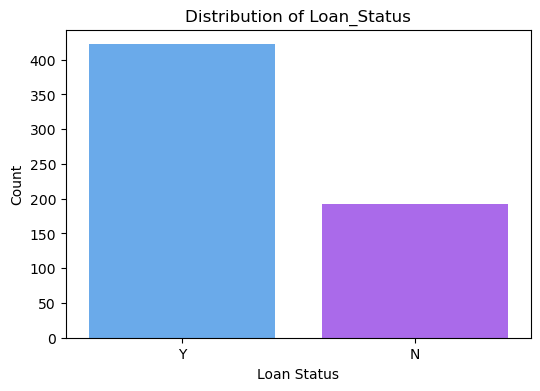

In [68]:
# Plot the distribution of Loan_Status
plt.figure(figsize=(6, 4))
sns.countplot(data=Loan_data, x='Loan_Status', palette='cool')  # Using palette for colors
plt.title('Distribution of Loan_Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


- The 'Y' (approved) class is significantly more frequent than the 'N' (not-approved) class, indicating an imbalance in the distribution of the Loan_Status variable.
- To address this imbalance and improve the model's ability to learn from the minority class ('N'), we will apply SMOTE (Synthetic Minority Over-sampling Technique) to generate synthetic samples for the 'N' class to esure fair representation for modeling.

**Resampling**

**Before Resampling**

In [69]:
X = Loan_data.drop('Loan_Status', axis=1)  # Features
y = Loan_data['Loan_Status']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Combine features and target for train and test sets
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

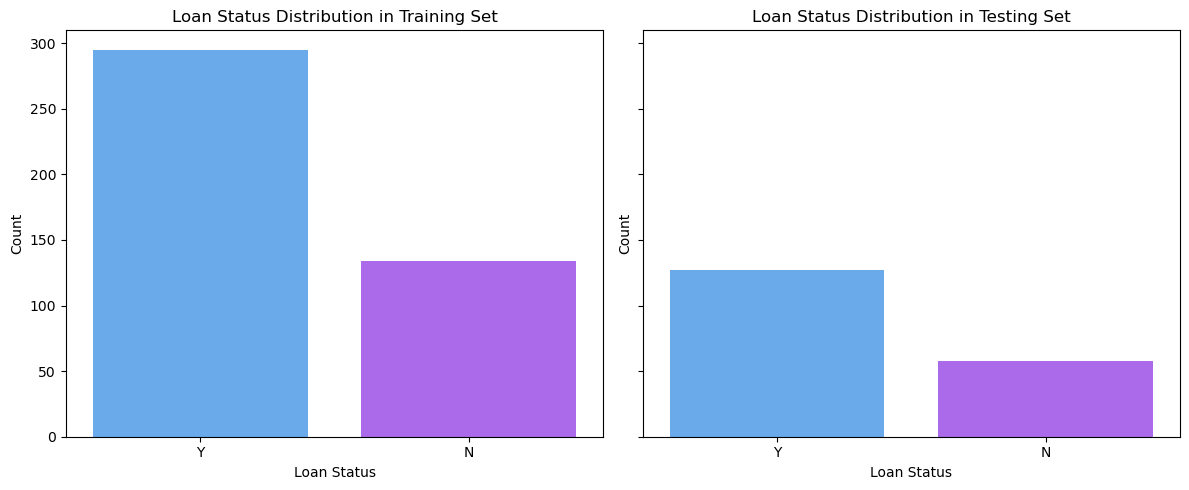

In [70]:
# Create subplots for side-by-side histograms of Loan_Status distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot training set distribution
sns.countplot(data=train_df, x='Loan_Status', palette='cool', ax=axes[0])
axes[0].set_title('Loan Status Distribution in Training Set')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Count')

# Plot testing set distribution
sns.countplot(data=test_df, x='Loan_Status', palette='cool', ax=axes[1])
axes[1].set_title('Loan Status Distribution in Testing Set')
axes[1].set_xlabel('Loan Status')
axes[1].set_ylabel('Count')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


**After Resampling**

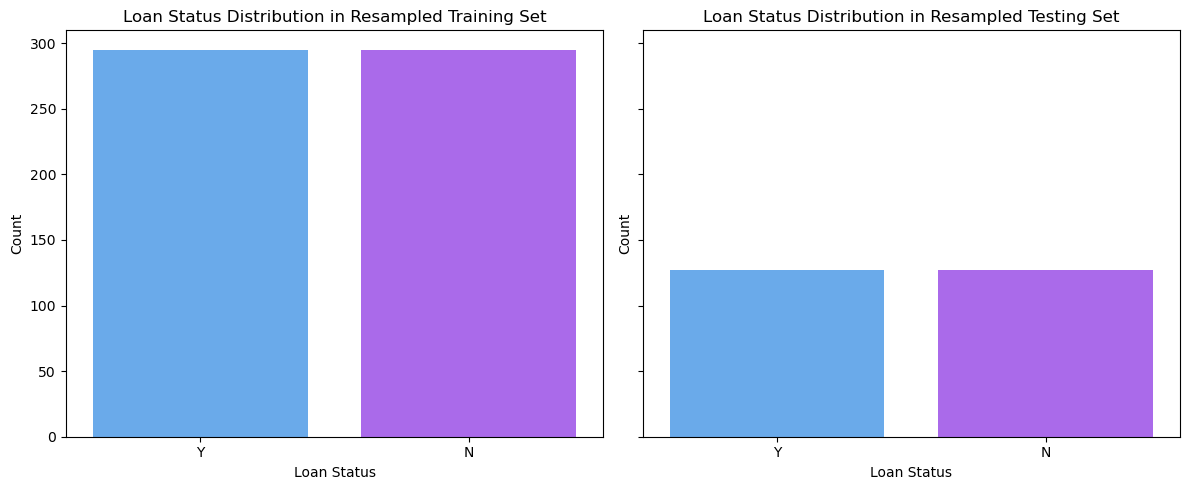

In [71]:
# Oversampling the minority class in the training set
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train, y_train)

# Oversampling the minority class in the testing set (optional)
X_test_resampled, y_test_resampled = ros.fit_resample(X_test, y_test)

# Combine the oversampled features and target into DataFrames
train_df_resampled = pd.concat([pd.DataFrame(X_train_resampled, columns=X_train.columns), 
                                pd.DataFrame(y_train_resampled, columns=['Loan_Status'])], axis=1)

test_df_resampled = pd.concat([pd.DataFrame(X_test_resampled, columns=X_test.columns), 
                               pd.DataFrame(y_test_resampled, columns=['Loan_Status'])], axis=1)


# Create subplots for side-by-side histograms of Loan_Status distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot resampled training set distribution
sns.countplot(data=train_df_resampled, x='Loan_Status', palette='cool', ax=axes[0])
axes[0].set_title('Loan Status Distribution in Resampled Training Set')
axes[0].set_xlabel('Loan Status')
axes[0].set_ylabel('Count')

# Plot resampled testing set distribution
sns.countplot(data=test_df_resampled, x='Loan_Status', palette='cool', ax=axes[1])
axes[1].set_title('Loan Status Distribution in Resampled Testing Set')
axes[1].set_xlabel('Loan Status')
axes[1].set_ylabel('Count')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


- The resampling balances loan statuses ("Y" and "N") in both training and testing sets, ensuring fair representation for modeling.

In [72]:
# Combine resampled training and testing datasets into one DataFrame
combined_df_resampled = pd.concat([train_df_resampled, test_df_resampled], axis=0, ignore_index=True)

# Optionally, store the combined DataFrame into a CSV
combined_df_resampled.to_csv('combined_df_resampled.csv', index=False)

print("Combined resampled datasets saved as 'combined_df_resampled.csv'.")

Combined resampled datasets saved as 'combined_df_resampled.csv'.


**Loan Status by Gender**

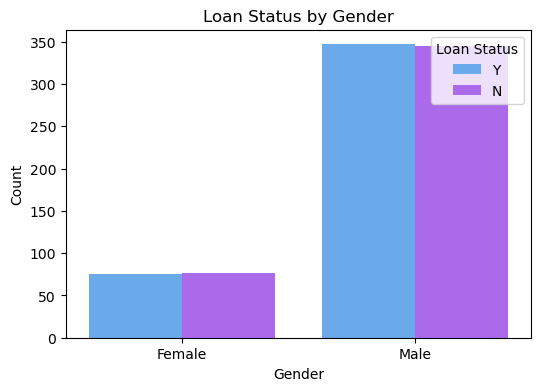

In [73]:
plt.figure(figsize=(6, 4))
sns.countplot(data=combined_df_resampled, x='Gender', hue='Loan_Status', palette='cool')
plt.title('Loan Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

- The chart shows that **more males** applied for loans than females. **Male applicants** have a higher approval rate, while **female applicants** experience a near equal split between loan approvals and rejections. This suggests that gender may influence loan approval, with males having a slight advantage.

**Loan Status by Marital Status**

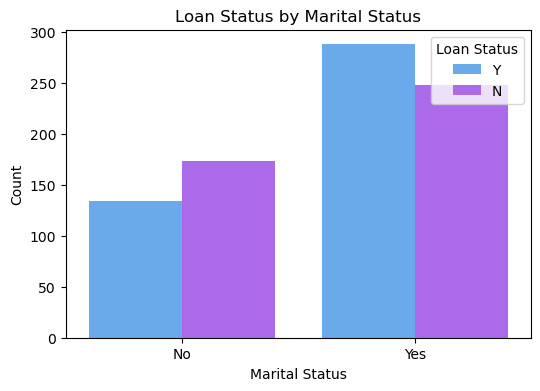

In [74]:
plt.figure(figsize=(6, 4))
sns.countplot(data=combined_df_resampled, x='Married', hue='Loan_Status', palette='cool')
plt.title('Loan Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

- Married applicants have a higher count of loan approvals compared to unmarried applicants. This suggests marital status may positively influence loan approval likelihood, potentially reflecting stronger financial stability among married individuals.

**Loan Status by Number of Dependents**

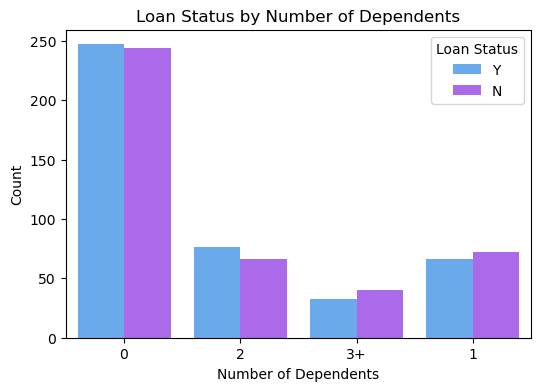

In [75]:
plt.figure(figsize=(6, 4))
sns.countplot(data=combined_df_resampled, x='Dependents', hue='Loan_Status', palette='cool')
plt.title('Loan Status by Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

- Applicants with no dependents have the highest loan approval rates. Approval likelihood decreases as the number of dependents increases, indicating dependents may affect creditworthiness.

**Loan Status by Education**

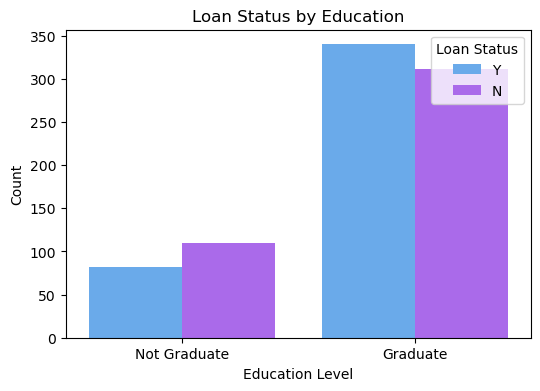

In [76]:
plt.figure(figsize=(6, 4))
sns.countplot(data=combined_df_resampled, x='Education', hue='Loan_Status', palette='cool')
plt.title('Loan Status by Education')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

- Graduates have significantly higher loan approval rates compared to non-graduates. Education level appears to positively influence loan approval likelihood.

**Loan Status by Employment Type**

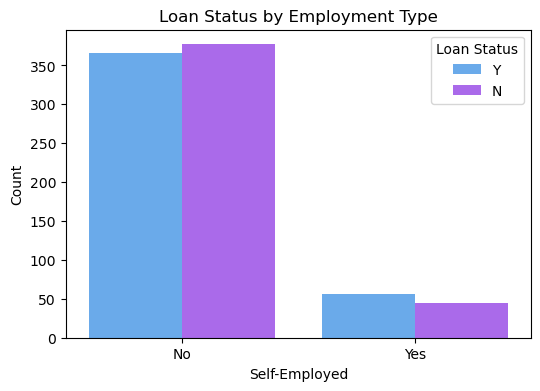

In [77]:
plt.figure(figsize=(6, 4))
sns.countplot(data=combined_df_resampled, x='Self_Employed', hue='Loan_Status', palette='cool')
plt.title('Loan Status by Employment Type')
plt.xlabel('Self-Employed')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()



- Non-self-employed individuals have significantly more loan applications, with slightly higher rejections than approvals. Self-employed individuals have fewer applications overall, with a more balanced approval-rejection ratio.

**Loan Status by Credit History**

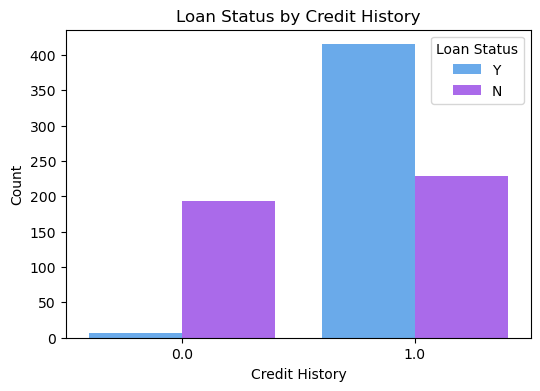

In [78]:
plt.figure(figsize=(6, 4))
sns.countplot(data=combined_df_resampled, x='Credit_History', hue='Loan_Status', palette='cool')
plt.title('Loan Status by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

- Applicants with a **credit history (1.0)** have significantly higher loan approvals (Y) compared to rejections (N), while those **without a credit history (0.0)** face far fewer approvals and more rejections. This highlights the strong influence of credit history on loan approval outcomes.

**Loan Status by Property Area**

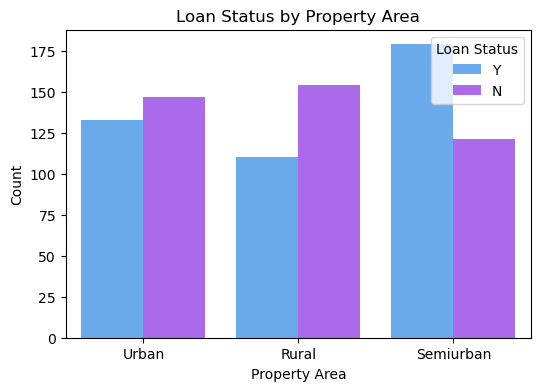

In [79]:
plt.figure(figsize=(6, 4))
sns.countplot(data=combined_df_resampled, x='Property_Area', hue='Loan_Status', palette='cool')
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.legend(title='Loan Status', loc='upper right')
plt.show()

- Loan approvals are highest in semiurban areas, while urban and rural areas show more balanced outcomes. Location likely influences loan approval.

**Applicant Income vs Loan Status**

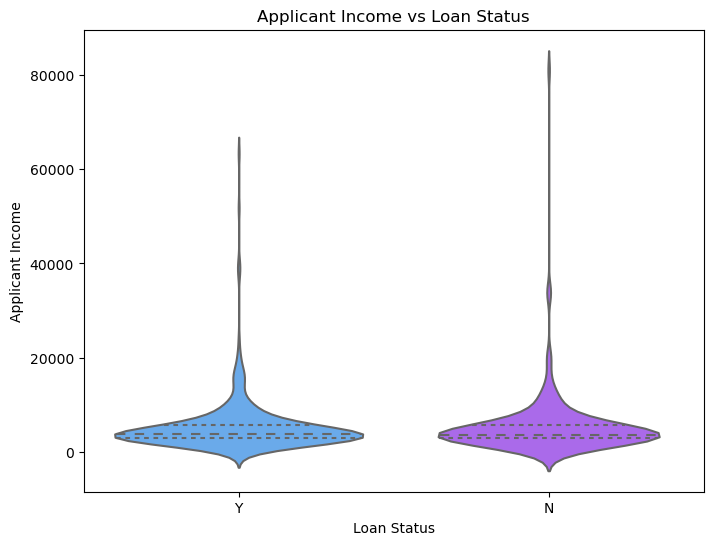

In [80]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=combined_df_resampled, x='Loan_Status', y='ApplicantIncome', palette='cool', inner="quartile")
plt.title('Applicant Income vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Applicant Income')
plt.show()


- The violin plot shows similar income distributions for approved (Y) and unapproved (N) loans, with most applicants in the lower income range. High incomes appear in both groups, suggesting that *Applicant Income* alone has minimal impact on loan approval.

**Coapplicant Income vs Loan Status**

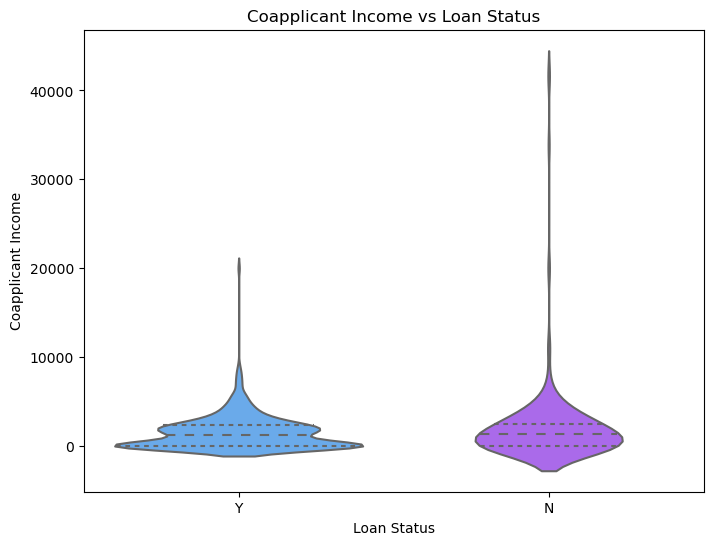

In [81]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=combined_df_resampled, x='Loan_Status', y='CoapplicantIncome', palette='cool', inner="quartile")
plt.title('Coapplicant Income vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Coapplicant Income')
plt.show()


- Most coapplicants have zero income in both groups, suggesting coapplicant income has minimal impact on loan approval.

**Loan Amount vs Loan Status**

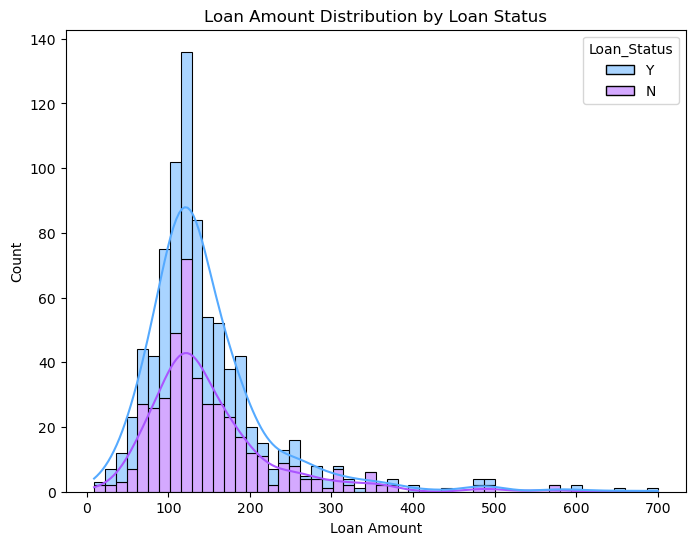

In [82]:
plt.figure(figsize=(8, 6))
sns.histplot(data=combined_df_resampled, x='LoanAmount', hue='Loan_Status', multiple="stack", kde=True, palette='cool')
plt.title('Loan Amount Distribution by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()


- The histogram shows that **approved loans (Y)** are more frequent and cluster around lower loan amounts, while **rejected loans (N)** are fewer but follow a similar distribution. Loan amounts above 250 are rare for both statuses.

#### summary

- **Imbalance**: Approvals ('Y') outnumber rejections ('N'); SMOTE ensures class balance.  
- **Key Drivers**: Credit history, education, marital status, and location positively influence approvals.  
- **Gender & Dependents**: Males and applicants with fewer dependents see higher approval rates.  
- **Minimal Impact**: Applicant income, coapplicant income, and loan amounts show limited influence on outcomes.  

Overall, credit history and demographic factors are strong predictors of loan approval.

## Data Preprocessing <a id="chapter6"><a>

<div class="alert alert-block alert-info">
  <b>Data preprocessing</b> is a fundamental step in the data analysis and machine learning pipeline, encompassing the transformation and organization of raw data into a format suitable for analysis. This process includes activities such as normalization, encoding categorical variables, feature scaling, and splitting data into training and testing sets, thereby enhancing the performance and accuracy of machine learning models.
</div>


**Drop an identifier**

In [83]:
# Drop 'Loan_ID' as it's not useful for prediction
combined_df_resampled = combined_df_resampled.drop(columns=['Loan_ID'])

**Label Encoding**

In [84]:
# Label Encoding for binary categorical columns
label_encoder = LabelEncoder()
combined_df_resampled['Gender'] = label_encoder.fit_transform(combined_df_resampled['Gender'])  # Convert 'Male'/'Female' to 1/0
combined_df_resampled['Married'] = label_encoder.fit_transform(combined_df_resampled['Married'])  # Convert 'Yes'/'No' to 1/0
combined_df_resampled['Education'] = label_encoder.fit_transform(combined_df_resampled['Education'])  # Convert 'Graduate'/'Not Graduate' to 1/0
combined_df_resampled['Self_Employed'] = label_encoder.fit_transform(combined_df_resampled['Self_Employed'])  # Convert 'Yes'/'No' to 1/0
combined_df_resampled['Loan_Status'] = label_encoder.fit_transform(combined_df_resampled['Loan_Status'])  # Convert 'Y'/'N' to 1/0

**One-Hot Encoding**

In [85]:
# One-Hot Encoding for 'Dependents' and 'Property_Area' (more than two categories)
combined_df_resampled = pd.get_dummies(combined_df_resampled, columns=['Dependents', 'Property_Area'], drop_first=True)


**Scaling Numerical Columns**

In [86]:
# Scaling Numerical Columns
scaler = StandardScaler()
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
combined_df_resampled[numerical_columns] = scaler.fit_transform(combined_df_resampled[numerical_columns])

In [87]:
Loan_data_encoded = combined_df_resampled.copy() 

## Feature Engineering<a id="chapter7"><a>

<div class="alert alert-block alert-info">
  <b>Explanation:</b>  Feature engineering is the process of selecting, modifying, or creating new features to improve the performance of a machine learning model. It involves transforming raw data into formats that better represent the underlying patterns of the data, making it more useful for predictive modeling.
</div>

**1. Original Features**

In [88]:
Loan_data_encoded.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,-0.553540,0.162374,-0.332975,0.254431,0.557278,1,False,False,False,False,True
1,1,1,0,0,-0.302953,0.050889,-0.382087,0.254431,0.557278,1,False,False,False,False,False
2,1,1,0,0,-0.259140,-0.495137,-0.455755,0.254431,0.557278,1,False,False,False,True,False
3,1,1,0,0,-0.088142,-0.264382,-0.271585,0.254431,0.557278,1,False,False,False,True,False
4,1,0,0,0,-0.289399,-0.495137,-0.627647,0.254431,0.557278,0,False,False,False,False,True


In [89]:
Loan_data_encoded.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

**1.1. Correlation Matrix**

In [90]:
selected_features = ['Loan_Status', 'Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Semiurban', 'Property_Area_Urban'] 

# Subset the dataset
subset_df = Loan_data_encoded[selected_features]

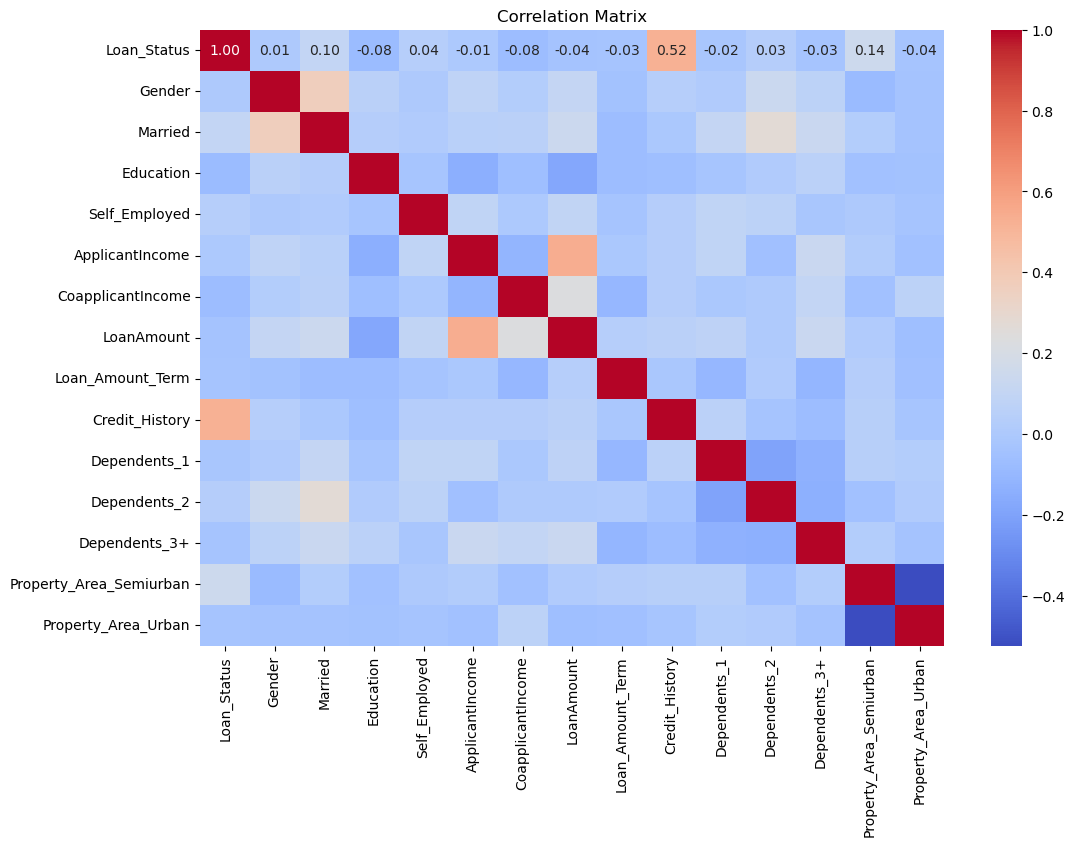

In [91]:
# Compute correlation matrix
correlation_matrix = subset_df.corr()

# Visualize using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

- The correlation heatmap reveals that **Credit History** has the strongest positive correlation with **Loan Status**, indicating its significant influence on loan approval. Other moderate correlations include **Coapplicant Income** with **Married** and **Applicant Income** with **Loan Amount**. Most other variables, like **Gender**, **Education**, and **Self-Employed**, show weak or negligible correlations, suggesting limited impact on loan outcomes or relationships with other factors.
- Overall, the data shows no signs of multicollinearity, making it suitable for predictive modeling. Next, we will proceed with feature building to further optimize our features.

**2. Feature Building**

**2.1. Gender Education Interaction**

- `Gender` and `Education` represent individual features. Combine them into a single interaction feature, `Gender_Education_Interaction`, which encodes different combinations of gender and education status as distinct numeric values, simplifying the dataset while retaining key information.

In [92]:
def gender_education_interaction(row):
    if row['Gender'] == 'Female' and row['Education'] == 'Not Graduate':
        return 0
    elif row['Gender'] == 'Female' and row['Education'] == 'Graduate':
        return 1
    elif row['Gender'] == 'Male' and row['Education'] == 'Not Graduate':
        return 2
    elif row['Gender'] == 'Male' and row['Education'] == 'Graduate':
        return 3
    else:
        return -1  # Handle unexpected cases (if any)



**2.2. Total Dependents**

- `Dependents_1`, `Dependents_2`, and `Dependents_3+` represent different categories of dependents. Combine them into a single feature, `Total_Dependents`, which assigns a numeric value based on the category, simplifying the dataset.

In [93]:
Loan_data_encoded['Total_Dependents'] = (Loan_data_encoded['Dependents_1'] * 1 +
                                         Loan_data_encoded['Dependents_2'] * 2 +
                                         Loan_data_encoded['Dependents_3+'] * 3)


**2.3. Property Area Code**

- `Property_Area_Urban`, `Property_Area_Semiurban`, and `Property_Area_Rural` represent variations of the same attribute. Combine them into a single feature, `Property_Area_Code`, where `2` denotes urban, `1` denotes semiurban, and `0` denotes rural, simplifying the dataset.

In [94]:
def assign_property_area(row):
    if row['Property_Area_Urban'] == 1:
        return 2  # Urban
    elif row['Property_Area_Semiurban'] == 1:
        return 1  # Semiurban
    else:
        return 0  # Rural

Loan_data_encoded['Property_Area_Code'] = Loan_data_encoded.apply(assign_property_area, axis=1)

**2.4. High_Loan To Income_Risk**

- `ApplicantIncome`, `CoapplicantIncome`, and `Self_Employed` are combined to create a new feature, `Adjusted_Total_Income`, which accounts for self-employment status. This adjusted income is then used to calculate the `Loan_to_Income_Ratio` and flag high loan-to-income risk with the `High_Loan_to_Income_Risk` feature, simplifying the dataset while providing important financial insights.

In [95]:
# Calculate Total Income
Loan_data_encoded['Total_Income'] = (
    Loan_data_encoded['ApplicantIncome'] + Loan_data_encoded['CoapplicantIncome']
)

# Adjust Total Income based on Self_Employed status
Loan_data_encoded['Self_Employed_Factor'] = Loan_data_encoded['Self_Employed'].apply(lambda x: 1.2 if x == 'Yes' else 1.0)
Loan_data_encoded['Adjusted_Total_Income'] = Loan_data_encoded['Total_Income'] * Loan_data_encoded['Self_Employed_Factor']

# Calculate Loan-to-Income Ratio using Adjusted Total Income
Loan_data_encoded['Loan_to_Income_Ratio'] = (
    Loan_data_encoded['LoanAmount'] / Loan_data_encoded['Adjusted_Total_Income']
)

# Flag High Loan-to-Income Risk
Loan_data_encoded['High_Loan_to_Income_Risk'] = (
    Loan_data_encoded['Loan_to_Income_Ratio'] > 0.4
).astype(int)


**3. Drop Redundant Features**

In [96]:
Loan_data_encoded.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History',
       'Loan_Status', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Total_Dependents',
       'Property_Area_Code', 'Total_Income', 'Self_Employed_Factor',
       'Adjusted_Total_Income', 'Loan_to_Income_Ratio',
       'High_Loan_to_Income_Risk'],
      dtype='object')

In [97]:
# Drop the columns used to create new features
Loan_data_encoded.drop(
    ['Gender', 'Married', 'Education', 'ApplicantIncome',
       'CoapplicantIncome', 'LoanAmount', 'Total_Income',
       'Dependents_1', 'Dependents_2', 'Dependents_3+','Self_Employed_Factor',
       'Property_Area_Semiurban', 'Property_Area_Urban',
     'Loan_to_Income_Ratio', 'Adjusted_Total_Income', 'Self_Employed'], 
    axis=1, 
    inplace=True
)
# Verify the drop
print(Loan_data_encoded.head())

   Loan_Amount_Term  Credit_History  Loan_Status  Total_Dependents  \
0          0.254431        0.557278            1                 0   
1          0.254431        0.557278            1                 0   
2          0.254431        0.557278            1                 0   
3          0.254431        0.557278            1                 0   
4          0.254431        0.557278            0                 0   

   Property_Area_Code  High_Loan_to_Income_Risk  
0                   2                         1  
1                   0                         1  
2                   1                         1  
3                   1                         1  
4                   2                         1  


**4. Correlation Matrix**

In [98]:
Loan_data_encoded.columns

Index(['Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Total_Dependents',
       'Property_Area_Code', 'High_Loan_to_Income_Risk'],
      dtype='object')

In [99]:
selected_features = ['Loan_Status', 'Total_Dependents', 'Loan_Amount_Term',
       'Property_Area_Code','High_Loan_to_Income_Risk', 'Credit_History'
      ] 

# Subset the dataset
subset_df = Loan_data_encoded[selected_features]

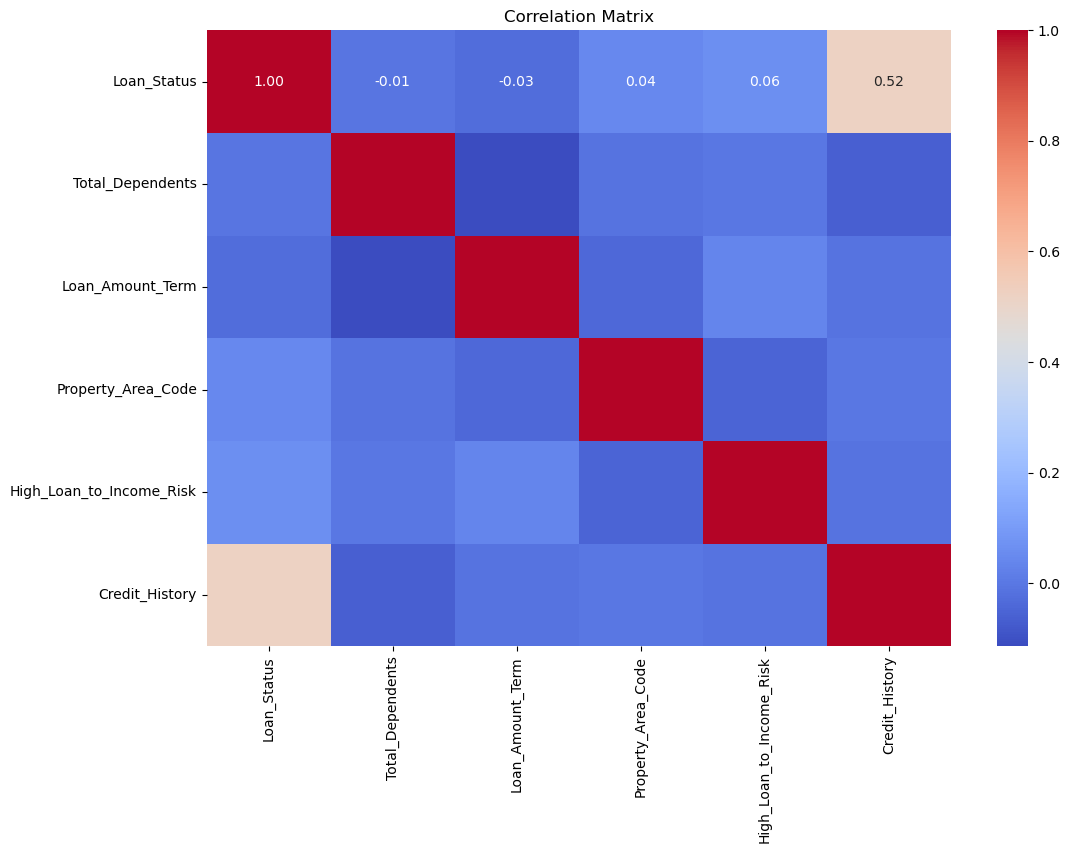

In [100]:
# Compute correlation matrix
correlation_matrix = subset_df.corr()

# Visualize using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

**5. Convert Data Type**

In [101]:
Loan_data_encoded.dtypes

Loan_Amount_Term            float64
Credit_History              float64
Loan_Status                   int32
Total_Dependents              int32
Property_Area_Code            int64
High_Loan_to_Income_Risk      int32
dtype: object

In [102]:
# Convert the specified columns to the required data types
Loan_data_encoded['Property_Area_Code'] = Loan_data_encoded['Property_Area_Code'].astype('int32')
Loan_data_encoded['Loan_Amount_Term'] = Loan_data_encoded['Loan_Amount_Term'].astype('float32')
Loan_data_encoded['Credit_History'] = Loan_data_encoded['Credit_History'].astype('float32')

# Check the updated data types
print(Loan_data_encoded.dtypes)

Loan_Amount_Term            float32
Credit_History              float32
Loan_Status                   int32
Total_Dependents              int32
Property_Area_Code            int32
High_Loan_to_Income_Risk      int32
dtype: object


**6. Split the Data**

In [103]:
# Split the data 
X = Loan_data_encoded.drop('Loan_Status', axis=1)
y = Loan_data_encoded['Loan_Status']

**7. Scaling Numerical Features**

## Model Training and Evaluation <a id="chapter8"><a>

<div class="alert alert-block alert-info">
  <b>Explanation:</b>  This step involves creating a mathemaical or computational model that categorize data into different classes or categories based on input features.
</div>

**Model Training**

In [104]:
# Train-Test Split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

# Sanity check
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define Models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Custom scoring metrics
brier_scorer = make_scorer(brier_score_loss, needs_proba=True)
scoring = {
    'accuracy': 'accuracy',
    'precision': 'precision_macro',
    'recall': 'recall_macro',
    'f1': 'f1_macro',
    'brier_score': brier_scorer
}

# Cross-validation on training set
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = {"Model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1 Score": [], "Brier Score": []}

for model_name, model in models.items():
    scores = cross_validate(model, X_train_scaled, y_train, cv=kf, scoring=scoring, n_jobs=-1)
    results["Model"].append(model_name)
    results["Accuracy"].append(scores['test_accuracy'].mean())
    results["Precision"].append(scores['test_precision'].mean())
    results["Recall"].append(scores['test_recall'].mean())
    results["F1 Score"].append(scores['test_f1'].mean())
    results["Brier Score"].append(scores['test_brier_score'].mean())

results_df = pd.DataFrame(results)
print("\nTraining Set Cross-Validation Results:")
print(results_df.round(3).sort_values(by="Accuracy", ascending=False))


Training set size: 590
Test set size: 254

Training Set Cross-Validation Results:
                 Model  Accuracy  Precision  Recall  F1 Score  Brier Score
3    Gradient Boosting     0.715      0.731   0.716     0.711        0.181
0  Logistic Regression     0.714      0.801   0.718     0.693        0.189
4  K-Nearest Neighbors     0.705      0.732   0.707     0.698        0.198
1        Random Forest     0.697      0.709   0.699     0.694        0.187
2        Decision Tree     0.690      0.699   0.692     0.687        0.195


**Summary:**

- **Top Performers:** `Gradient Boosting`, `Logistic Regression`, and `K-Nearest Neighbors` are the top models. `Gradient Boosting` excels in accuracy and balanced metrics, `Logistic Regression` leads in precision, and `KNN` shows consistent overall performance.  

- **Lowest Performer:** `Decision Tree` has the weakest metrics overall, making it the least effective model.

## Model Parameters and Hyperparameters tunning <a id="chapter9"><a>

<div class="alert alert-block alert-info">
<b>Explanation </b> Fine-tuning model parameters and hyperparameters is a crucial step in the machine learning workflow aimed at optimizing the performance of a model. Here are the primary purposes and benefits of fine-tuning:

* Improve Model Accuracy
* prevent Overfitting and Underfitting
* Enhance Model Efficiency
* Adapt to Specific Data Characteristics
* Improve Interpretability and Usability, and
* Maximize Utility of Hyperparameters.
</di>

**Gradient Boosting**

In [105]:
# Start MLflow tracking
with mlflow.start_run(run_name="Gradient_Boosting_Classifier"):

    # Define and Train Gradient Boosting
    params = {
        "n_estimators": 100,
        "learning_rate": 0.1,
        "max_depth": 3,
        "subsample": 0.8,
        "random_state": 42
    }
    model = GradientBoostingClassifier(**params)
    model.fit(X_train, y_train)

    # Log model parameters
    mlflow.log_params(params)

    # Evaluate the Model
    y_pred = model.predict(X_test)
    acc_tuned_gb_model = accuracy_score(y_test, y_pred)
    report_tuned_gb_model = classification_report(y_test, y_pred, output_dict=True)

    # Log metrics
    mlflow.log_metric("accuracy", acc_tuned_gb_model)
    mlflow.log_metric("precision", report_tuned_gb_model["weighted avg"]["precision"])
    mlflow.log_metric("recall", report_tuned_gb_model["weighted avg"]["recall"])
    mlflow.log_metric("f1_score", report_tuned_gb_model["weighted avg"]["f1-score"])

    # Print results
    print(f"Accuracy: {acc_tuned_gb_model}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Log the model
    mlflow.sklearn.log_model(model, "gradient_boosting_model")

    # Log the classification report as an artifact
    with open("classification_report.txt", "w") as f:
        f.write(classification_report(y_test, y_pred))
    mlflow.log_artifact("classification_report.txt")

Accuracy: 0.7283464566929134
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.65      0.70       122
           1       0.71      0.80      0.75       132

    accuracy                           0.73       254
   macro avg       0.73      0.73      0.73       254
weighted avg       0.73      0.73      0.73       254



2024/12/16 06:20:45 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


**Logistic Regression**

In [106]:
# Start MLflow tracking
with mlflow.start_run(run_name="Logistic_Regression"):

    # Define and Train Logistic Regression
    params = {
        "C": 1.0,
        "solver": 'lbfgs',
        "max_iter": 100,
        "random_state": 42
    }
    model = LogisticRegression(**params)
    model.fit(X_train, y_train)

    # Log model parameters
    mlflow.log_params(params)

    # Evaluate the Model
    y_pred = model.predict(X_test)
    acc_tuned_lr_model = accuracy_score(y_test, y_pred)

    # Get the classification report
    report_tuned_lr_model = classification_report(y_test, y_pred, output_dict=True)

    # Log metrics from the classification report
    mlflow.log_metric("accuracy", acc_tuned_lr_model)
    mlflow.log_metric("precision", report_tuned_lr_model["weighted avg"]["precision"])
    mlflow.log_metric("recall", report_tuned_lr_model["weighted avg"]["recall"])
    mlflow.log_metric("f1_score", report_tuned_lr_model["weighted avg"]["f1-score"])

    # Print results
    print(f"Accuracy: {acc_tuned_lr_model}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Log the model
    mlflow.sklearn.log_model(model, "logistic_regression_model")

    # Log the classification report as an artifact
    with open("classification_report_lr.txt", "w") as f:
        f.write(classification_report(y_test, y_pred))
    mlflow.log_artifact("classification_report_lr.txt")


Accuracy: 0.7401574803149606
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.48      0.64       122
           1       0.67      0.98      0.80       132

    accuracy                           0.74       254
   macro avg       0.82      0.73      0.72       254
weighted avg       0.81      0.74      0.72       254



2024/12/16 06:20:48 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


**K-Nearest Neighbors**

In [107]:
# Start MLflow tracking
with mlflow.start_run(run_name="K-Nearest_Neighbors"):

    # Define and Train K-Nearest Neighbors
    params = {
        "n_neighbors": 5,           # Number of neighbors
        "weights": 'uniform',       # Uniform weights or distance-based
        "algorithm": 'auto',        # Algorithm to compute nearest neighbors
        "metric": 'minkowski'      # Distance metric
    }
    model = KNeighborsClassifier(**params)
    model.fit(X_train, y_train)

    # Log model parameters
    mlflow.log_params(params)

    # Evaluate the Model
    y_pred = model.predict(X_test)
    acc_tuned_knn_model = accuracy_score(y_test, y_pred)
    report_tuned_knn_model = classification_report(y_test, y_pred, output_dict=True)

    # Log metrics
    mlflow.log_metric("accuracy", acc_tuned_knn_model)
    mlflow.log_metric("precision", report_tuned_knn_model["weighted avg"]["precision"])
    mlflow.log_metric("recall", report_tuned_knn_model["weighted avg"]["recall"])
    mlflow.log_metric("f1_score", report_tuned_knn_model["weighted avg"]["f1-score"])

    # Print results
    print(f"Accuracy: {acc_tuned_knn_model}")
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Log the model
    mlflow.sklearn.log_model(model, "knn_model")

    # Log the classification report as an artifact
    with open("classification_report_knn.txt", "w") as f:
        f.write(classification_report(y_test, y_pred))
    mlflow.log_artifact("classification_report_knn.txt")


Accuracy: 0.7283464566929134
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.60      0.68       122
           1       0.70      0.85      0.76       132

    accuracy                           0.73       254
   macro avg       0.74      0.72      0.72       254
weighted avg       0.74      0.73      0.72       254



2024/12/16 06:20:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


**Model Comparison Matrix**

In [108]:
model_names = ["Gradient Boosting HT", "Logistic Regression HT", "K-Nearest Neighbors HT"]
accuracies = [acc_tuned_gb_model, acc_tuned_lr_model, acc_tuned_knn_model] 
# Extracting precision, recall, and f1-score for each model
precision = [
    report_tuned_gb_model["weighted avg"]["precision"],
    report_tuned_lr_model["weighted avg"]["precision"],
    report_tuned_knn_model["weighted avg"]["precision"]
]

recall = [
    report_tuned_gb_model["weighted avg"]["recall"],
    report_tuned_lr_model["weighted avg"]["recall"],
    report_tuned_knn_model["weighted avg"]["recall"]
]

f1_score = [
    report_tuned_gb_model["weighted avg"]["f1-score"],
    report_tuned_lr_model["weighted avg"]["f1-score"],
    report_tuned_knn_model["weighted avg"]["f1-score"]
]

# Create the DataFrame
evaluation_results = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "Precision": precision,
    "Recall": recall,
    "F1 Score": f1_score
})

In [109]:
# Extract only the relevant columns from both DataFrames
results_accuracy = results_df[["Model", "Accuracy", "Precision", "Recall", "F1 Score"]]
evaluation_accuracy = evaluation_results[["Model", "Accuracy", "Precision", "Recall", "F1 Score"]]

# Combine both DataFrames
combined_df = pd.concat([results_accuracy, evaluation_accuracy], ignore_index=True)


sorted_combined_df = combined_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

                    Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression HT  0.740157   0.812547  0.740157  0.720608
1    Gradient Boosting HT  0.728346   0.731089  0.728346  0.726392
2  K-Nearest Neighbors HT  0.728346   0.738541  0.728346  0.723469
3       Gradient Boosting  0.715254   0.730741  0.716378  0.711436
4     Logistic Regression  0.713559   0.800648  0.717971  0.693075
5     K-Nearest Neighbors  0.705085   0.732035  0.707122  0.697842
6           Random Forest  0.696610   0.708791  0.698797  0.693748
7           Decision Tree  0.689831   0.699496  0.691804  0.687426


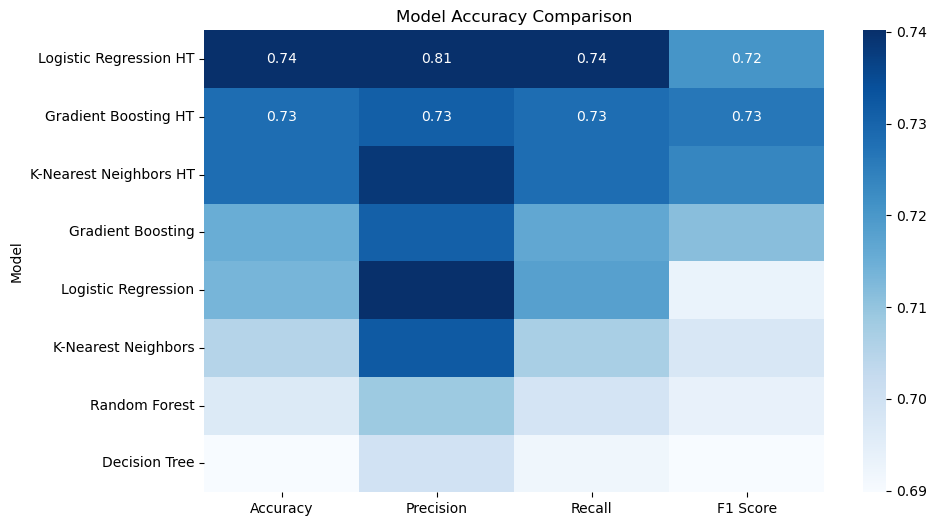

In [110]:
# Print the combined and sorted DataFrame
print(sorted_combined_df)

# Prepare data for heatmap visualization
heatmap_data = sorted_combined_df.set_index("Model")

# Plot the heatmap for model comparison
plt.figure(figsize=[10, 6])
sns.heatmap(
    heatmap_data,
    annot=True,
    cmap='Blues',
    fmt='.2f',
    vmin=heatmap_data["Accuracy"].min(),
    vmax=heatmap_data["Accuracy"].max()
)
plt.title("Model Accuracy Comparison")
plt.show()


- **Logistic Regression HT** performs best with the highest accuracy (0.74) and precision (0.81), showing the benefit of hyperparameter tuning. Gradient Boosting HT and KNN HT also perform well, while **Decision Tree** and **Random Forest** lag behind, highlighting the strength of simpler or tuned models for this dataset.

## Conclusion <a id="chapter10"><a>

<div class="alert alert-block alert-info">
  <b>Conclusion:</b> The conclusion of a data analysis project ties together the findings and insights gained from the data. It reflects on the effectiveness of the preprocessing and cleaning steps, discusses the accuracy and reliability of the models used, and provides recommendations based on the results. A strong conclusion not only summarizes key points but also suggests future directions for research or improvements, emphasizing the overall impact and value of the analysis.
</div>


### Revised Conclusion:

This project aimed to develop a predictive model for loan approval outcomes (Loan_Status). By leveraging a comprehensive dataset and employing advanced machine learning techniques, I successfully created models capable of predicting loan approvals with high accuracy.

Through rigorous preprocessing, exploratory data analysis (EDA), feature engineering, and hyperparameter tuning, several models were trained and evaluated based on key metrics: accuracy, precision, recall, and F1 score.

Most models demonstrated strong performance across metrics, particularly after hyperparameter tuning. Logistic Regression HT, Gradient Boosting HT, and K-Nearest Neighbors HT emerged as the top performers. Among these, **Logistic Regression HT** achieved the highest accuracy and precision, making it particularly effective for minimizing false positives and ensuring reliable loan approval predictions.

### Best Model:
**Logistic Regression HT** was selected as the best model for deployment due to its superior accuracy, highest precision, and competitive performance across recall and F1 score. Its reliability and effectiveness make it the ideal choice for predicting loan approvals.